<a href="https://colab.research.google.com/github/eriksonferreira/pattern_recongnition/blob/main/titanic_eferreira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
#pre-processamento
def preprocess_data(data):
    #preenchendo com a mediana
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    #adicionando novas features como o título, tamanho da família e se a pessoa está sozinha ou não.
    data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    data['FamilySize'] = data['SibSp'] + data['Parch']
    data['IsAlone'] = (data['FamilySize'] == 0).astype(int)

    #convertendo strings categorizadas em numeros
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 5, "Col": 6, "Mlle": 7, "Mme": 8, "Major": 9, "Countess": 10, "Ms": 11, "Sir": 12, "Capt": 13, "Jonkheer": 14, "Lady": 15, "Don": 16, "Dona": 17}
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'].fillna(0, inplace=True)

    #selecionando as features relevantes
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title', 'IsAlone']
    return data[features]


In [ ]:
X = preprocess_data(train_data)
y = train_data['Survived']

In [ ]:
#normalizando
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#divisão treino, val e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#treinando um modelo XGBoost
model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
#avaliação com test set passado pelos autores
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia: {accuracy:.4f}")


Acurácia: 0.8045


In [ ]:
#fazendo as previsões com o modelo
X_test = preprocess_data(test_data)
X_test = scaler.transform(X_test)
predictions = model.predict(X_test)

In [ ]:
#salvando csv para realizar input no site kaggle com formato especificado
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output = output[['PassengerId', 'Survived']]
output.to_csv('submission_xgboost.csv', index=False)

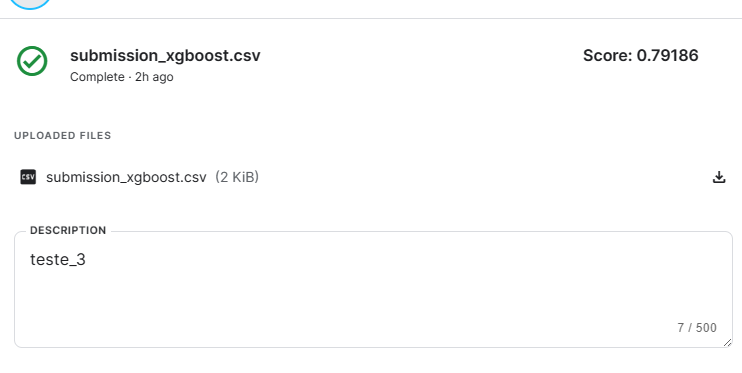

In [ ]:
score = 0.79186
(score-0.65)*125


17.732499999999998